In [1]:
import numpy as np  
import pandas as pd  
import yfinance as yf 
from scipy.stats import norm 
import matplotlib.pyplot as plt  
%matplotlib inline

In [2]:
ticker = 'PG'  
data = pd.DataFrame()
# data[ticker] = web.DataReader(ticker, data_source='yahoo', start='2007-1-1', end='2017-3-21')['Adj Close']
data[ticker] = yf.download(ticker, start='2007-1-1', end='2017-3-21')['Close']

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_30076\4250615083.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data[ticker] = yf.download(ticker, start='2007-1-1', end='2017-3-21')['Close']
[*********************100%***********************]  1 of 1 completed


In [3]:
log_returns = np.log(1 + data.pct_change())

In [4]:
log_returns.tail()

,PG
Date,
2017-03-14,-0.003401
2017-03-15,0.004386
2017-03-16,0.000437
2017-03-17,-0.004823
2017-03-20,0.002415


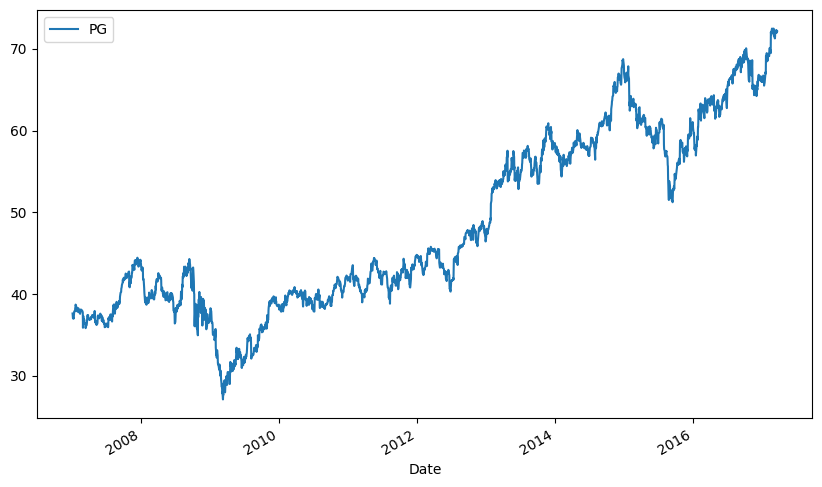

In [5]:
data.plot(figsize=(10, 6));

In [6]:
r = 0.025

In [7]:
stdev = log_returns.std() * 250 ** 0.5
stdev

PG    0.176585
dtype: float64

In [8]:
type(stdev)

pandas.core.series.Series

In [9]:
stdev = stdev.values
stdev

array([0.17658466])

In [10]:
T = 1.0 
t_intervals = 250 
delta_t = T / t_intervals  
iterations = 10000  

In [11]:
Z = np.random.standard_normal((t_intervals + 1, iterations))  
S = np.zeros_like(Z) 
S0 = data.iloc[-1]  
S[0] = S0 

for t in range(1, t_intervals + 1):
    S[t] = S[t-1] * np.exp((r - 0.5 * stdev ** 2) * delta_t + stdev * delta_t ** 0.5 * Z[t])

In [12]:
S

array([[72.13172913, 72.13172913, 72.13172913, ..., 72.13172913,
        72.13172913, 72.13172913],
       [71.91966707, 72.66167913, 72.06015776, ..., 70.50058708,
        71.66779015, 72.40228509],
       [72.56963688, 71.8367646 , 71.83847069, ..., 71.87413615,
        73.43979822, 73.20645333],
       ...,
       [75.62101162, 80.79065772, 86.8756088 , ..., 68.46633995,
        74.42747942, 64.66105161],
       [74.64643149, 80.5536445 , 86.62208298, ..., 68.84282146,
        74.3137346 , 65.19076519],
       [75.04556285, 80.46835942, 86.40262576, ..., 67.5386584 ,
        74.09259124, 66.44792371]])

In [13]:
S.shape

(251, 10000)

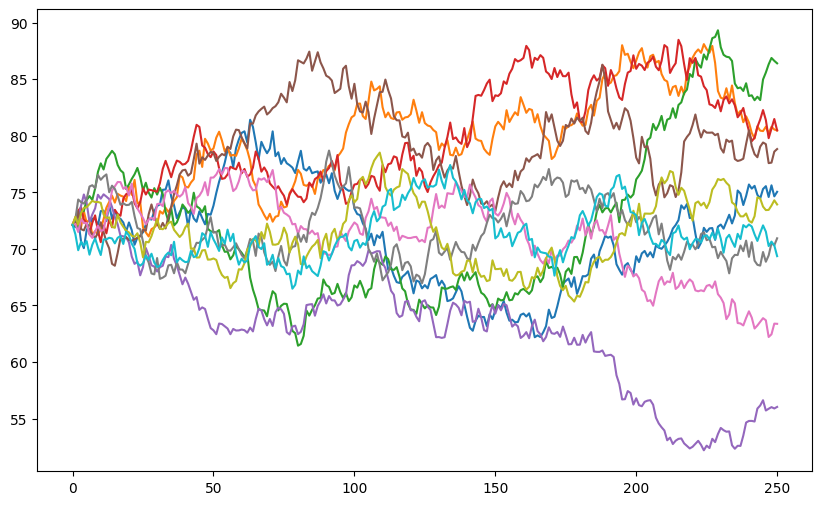

In [14]:
plt.figure(figsize=(10, 6))
plt.plot(S[:, :10]);

******

In [15]:
p = np.maximum(S[-1] - 110, 0)

In [16]:
p

array([0., 0., 0., ..., 0., 0., 0.])

In [17]:
p.shape

(10000,)

In [18]:
C = np.exp(-r * T) * np.sum(p) / iterations
C  

0.07151893171587337